This scripts compares resolutions between SmallShower Reconstruction and TankWise Reconstruction.
1. Core Resolution
2. Angular Resolution
3. Energy Resolution

Idea here is to move to SmallShower reconstruction so that we don't have to go throught the tankwsie laputop code review process.

In [16]:
import numpy
print "Steering File"
print "Select which variable to choose as energy proxy."

import matplotlib
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
%matplotlib inline

params = {'legend.fontsize': 18,
          'axes.labelsize': 22,
          'axes.titlesize':23,
          'xtick.labelsize':20,
          'ytick.labelsize':20,
          'figure.figsize':(8, 8)}
plt.rcParams.update(params)

import glob
import numpy
import sys, os
import tables
from decimal import Decimal
from scipy.optimize import curve_fit

name = '_paper'#'_14mar2019' #'_13aug2018'#'_1aug2018', '_02oct2018' 
savefig = True

Steering File
Select which variable to choose as energy proxy.


In [2]:
print 'All required functions.'

ene_bins    = numpy.linspace(4.0,7.6,19)
angres_bins = numpy.linspace(-100,100,201)
eneres_bins = numpy.linspace(-2,2,81)
mid_ene     = 0.5*(ene_bins[:-1] + ene_bins[1:])
mid_angres  = 0.5*(angres_bins[:-1] + angres_bins[1:])
mid_eneres  = 0.5*(eneres_bins[:-1] + eneres_bins[1:])

def weighted_std(values, weights):
    """
    Return the weighted average and standard deviation.
    values, weights -- Numpy ndarrays with the same shape.
    """
    average  = numpy.average(values, weights=weights)
    variance = numpy.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return numpy.sqrt(variance)

def energy_resolution(tenergy, penergy, weight):
    print 'working on energy resolution'
    ml_ene_sigma = numpy.array([])
    ml_ene       = numpy.array([])
    
    for i in range(len(mid_ene)):
        maske = (tenergy>=ene_bins[i])*((tenergy<ene_bins[i+1]))
        pene_diff = tenergy[maske] - penergy[maske]
        if len(pene_diff)>5:
            ml_ene_sigma = numpy.append(ml_ene_sigma, weighted_std(pene_diff, weights=weight[maske]))
            ml_ene       = numpy.append(ml_ene, mid_ene[i])

    return ml_ene_sigma, ml_ene
    
def zenith_resolution(tenergy, penergy, tzenith, pzenith, weight):
    print 'working on zenith resolution'
    
    reco_list = numpy.array([])
    ene_list  = numpy.array([])
    
    for i in range(len(mid_ene)):
        maske = (tenergy>=ene_bins[i])*((tenergy<ene_bins[i+1]))
        zen_diff = tzenith[maske] - pzenith[maske]
        if len(zen_diff)>5:
            reco_list= numpy.append(reco_list, weighted_std(zen_diff, weights=weight[maske]))
            ene_list = numpy.append(ene_list, mid_ene[i])

    return reco_list, ene_list

def core_resolution(tenergy, penergy, truex, truey, recox, recoy, weight):
    print 'working on core resolution'
    distance = numpy.sqrt((truex-recox)**2 + (truey-recoy)**2)
    reco_list = numpy.array([])
    ene_list  = numpy.array([])
    
    for i in range(len(mid_ene)):
        maske = (tenergy>=ene_bins[i])*((tenergy<ene_bins[i+1]))
        core_diff = distance[maske]
        if len(core_diff)>5:
            reco_list= numpy.append(reco_list, weighted_std(core_diff, weights=weight[maske]))
            ene_list = numpy.append(ene_list, mid_ene[i])

    return reco_list, ene_list
    

All required functions.


In [3]:
angle_bins    = numpy.linspace(0,66,34)
loge_bins     = numpy.linspace(4.0,7.4,35)
position_bins = numpy.linspace(-600, 600, 121)


In [4]:
savedir = '/Users/rameshkoirala/Documents/Paper/Plot/'
datadir     = "/Users/rameshkoirala/Documents/Paper/"
datafile    = "analysis_simulation_HLCCoreSeed_slcQcut_fracradius_final.h5"


hf         = tables.open_file(datadir+datafile)
logTenergy = numpy.log10(hf.root.Energy[:])
logPenergy = hf.root.PredictedLogEnergy_h4aOrig[:]
FiltCondt  = hf.root.FiltCondt[:]
LoudSta    = hf.root.LoudSta[:]
Nsta       = hf.root.Nsta[:]
Nslc       = hf.root.Nslc[:]
Ntanks     = hf.root.Ntanks[:]
PlaneZenith= hf.root.PlaneZenith[:]
Pulses     = hf.root.Pulses[:]
Qhillas    = hf.root.Qhillas[:]
Qmax       = Pulses[:,0]
Qsum2      = numpy.sum(Pulses[:,:2], axis=1)
Qtotalhlc = hf.root.Qtotalhlc[:]
Tcorex    = hf.root.Tcorex[:]
Tcorey    = hf.root.Tcorey[:]
Pcorex     = hf.root.PredictedX[:]
Pcorey     = hf.root.PredictedY[:]
Tzenith   = hf.root.Tzenith[:]
Pzenith    = hf.root.PredictedZen[:]
Weight    = hf.root.WeightH4aOrig[:]
maskene   = hf.root.maskTrainingEnergy[:]
hf.close()


# maskene includes:
#qualmask  = FiltCondt==1
#qualmask *= (LoudSta==1)
#qualmask *= (Qsum2<=qsum2_frac*Qtotalhlc) # Make sure not all charge is stored in 1 station.
#qualmask *= (numpy.cos(Pzenith)>=0.8)*(numpy.cos(Pzenith)<=1.0)


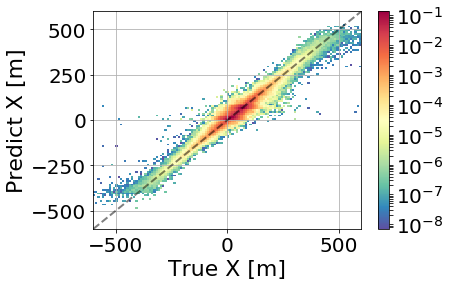

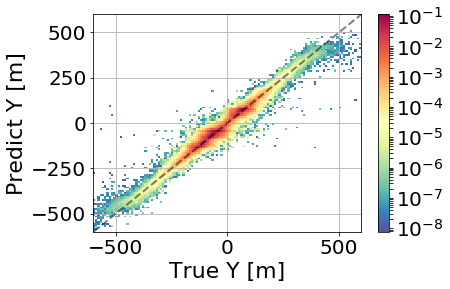

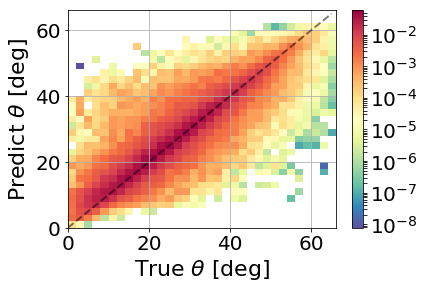

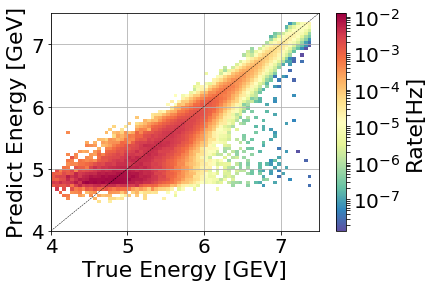

In [5]:
plt.figure()
abc = plt.hist2d(Tcorex, Pcorex, bins=[position_bins, position_bins], weights=Weight, 
                 norm=LogNorm(), cmap='Spectral_r')
plt.plot([-600,600], [-600,600], linestyle='--', lw=2, color='k', alpha=0.5)
plt.xlabel('True X [m]')
plt.ylabel('Predict X [m]')
plt.grid()
plt.colorbar()
if savefig:
    plt.savefig(savedir+'position_scatter_x%s.png'%name, bbox_inches='tight')

plt.figure()
abc = plt.hist2d(Tcorey, Pcorey, bins=[position_bins, position_bins], 
                 weights=Weight, norm=LogNorm(), cmap='Spectral_r')
plt.plot([-600,600], [-600,600], linestyle='--', lw=2, color='k', alpha=0.5)
plt.xlabel('True Y [m]')
plt.ylabel('Predict Y [m]')
plt.grid()
plt.colorbar()
if savefig:
    plt.savefig(savedir+'position_scatter_y%s.png'%name, bbox_inches='tight')

plt.figure()
abc = plt.hist2d(numpy.rad2deg(Tzenith), numpy.rad2deg(Pzenith), 
                 bins=[angle_bins, angle_bins], weights=Weight, 
                 norm=LogNorm(), cmap='Spectral_r')
plt.plot([0,65], [0,65], linestyle='--', lw=2, color='k', alpha=0.5)
plt.xlabel(r'True $\theta$ [deg]')
plt.ylabel(r'Predict $\theta$ [deg]')
plt.grid()
plt.colorbar()
if savefig:
    plt.savefig(savedir+'theta_scatter_alldata_ML%s.png'%name, bbox_inches='tight')

eb = numpy.linspace(4,7.5,71)
plt.figure()
abc = plt.hist2d(logTenergy[maskene], logPenergy, 
                 bins=[eb, eb], weights=Weight[maskene], 
                 norm=LogNorm(), cmap='Spectral_r')
plt.xlabel(r'True Energy [GEV]')
plt.ylabel(r'Predict Energy [GeV]')
plt.grid()
plt.plot([4,7.5], [4,7.5], 'k--', lw=0.5)
plt.colorbar(label='Rate[Hz]')
if savefig:
    plt.savefig(savedir+'ene_scatter_alldata_ML%s.png'%name, bbox_inches='tight')

In [6]:
# Apply mask to make it like energy.
logTenergy   = logTenergy[maskene]
Qtotalhlc = Qtotalhlc[maskene]
Nsta      = Nsta[maskene]
Nslc      = Nslc[maskene]
Ntanks    = Ntanks[maskene]
Qmax      = Qmax[maskene]
Qsum2     = Qsum2[maskene]
Tcorex    = Tcorex[maskene]
Tcorey    = Tcorey[maskene]
Pcorex    = Pcorex[maskene]
Pcorey    = Pcorey[maskene]
Tzenith   = Tzenith[maskene]
Pzenith   = Pzenith[maskene]
Weight    = Weight[maskene]

# Now apply additional quality cuts
qualmask  = (numpy.cos(Pzenith)>=0.9)*(numpy.cos(Pzenith)<=1.0)
qualmask *= (Nsta<=42)*(Qtotalhlc<=10**3.8)*(Qtotalhlc>=10**-0.2)
qualmask *= Qmax<=0.75*Qtotalhlc
qualmask *= Qsum2<=0.9*Qtotalhlc

# Apply mask to make it ready to calculate resolution.
logTenergy   = logTenergy[qualmask]
logPenergy   = logPenergy[qualmask]
Qtotalhlc = Qtotalhlc[qualmask]
Nsta      = Nsta[qualmask]
Qmax      = Qmax[qualmask]
Tcorex    = Tcorex[qualmask]
Tcorey    = Tcorey[qualmask]
Pcorex    = Pcorex[qualmask]
Pcorey    = Pcorey[qualmask]
Tzenith   = Tzenith[qualmask]
Pzenith   = Pzenith[qualmask]
Weight    = Weight[qualmask]


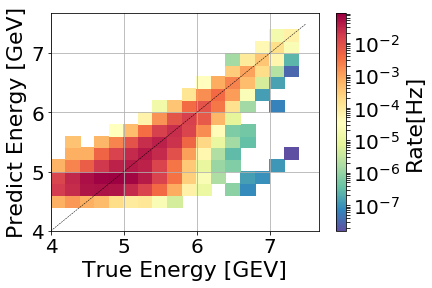

In [7]:
eb = numpy.linspace(4,7.4,18)
H, x,y = numpy.histogram2d(logTenergy, logPenergy, 
                 bins=[eb, eb], weights=Weight)

X,Y = numpy.meshgrid(x,y)
    
plt.figure()
'''abc = plt.hist2d(logTenergy, logPenergy, 
                 bins=[loge_bins, loge_bins], weights=Weight, 
                 norm=LogNorm(), cmap='Spectral_r')'''
plt.pcolormesh(X,Y,H.T,norm=LogNorm(), cmap='Spectral_r')
plt.xlabel(r'True Energy [GEV]')
plt.ylabel(r'Predict Energy [GeV]')
plt.grid()
plt.plot([4,7.5], [4,7.5], 'k--', lw=0.5)
plt.colorbar(label='Rate[Hz]')
#plt.savefig('/Users/ramesh/GoogleDrive/LowEnergy/RandomForest/ene_scatter_alldata_ML_afterQualCuts%s.png'%name)

In [8]:
zen_reso, zen_ene_bin = zenith_resolution(logTenergy, logPenergy, numpy.rad2deg(Tzenith),
                                           numpy.rad2deg(Pzenith), Weight)
ene_reso, ene_ene_bin = energy_resolution(logTenergy, logPenergy, Weight)
core_reso, core_ene_bin = core_resolution(logTenergy, logPenergy, Tcorex, Tcorey, 
                                          Pcorex, Pcorey, Weight)

working on zenith resolution
working on energy resolution
working on core resolution


[5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9]
[15.61872258 13.84062222 12.00074665  9.72691044  8.51791604  7.75109172
  6.94887477  6.18458352]
[5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9]
[3.95728387 3.48340482 2.86076094 2.5113158  1.9336716  1.91624131
 1.61137682 1.45641881]
[5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9]
[0.26315873 0.24321619 0.19524402 0.15688428 0.13417632 0.11635729
 0.09901652 0.08815472]


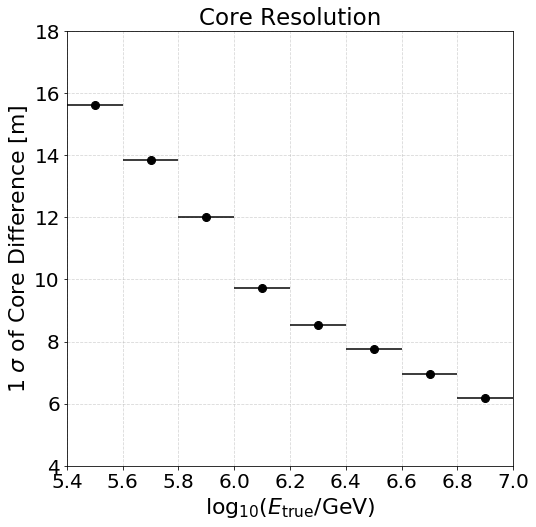

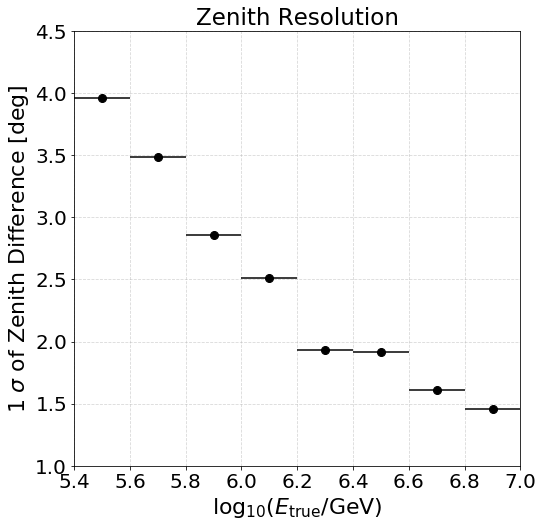

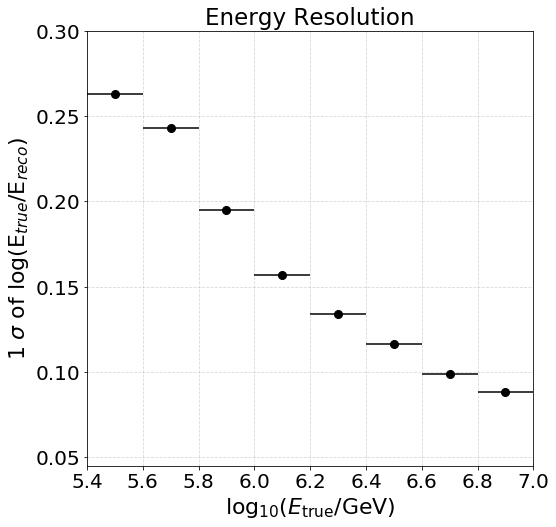

In [38]:
mask = (core_ene_bin>5.4)*(core_ene_bin<7.0)
print core_ene_bin[mask]
print core_reso[mask]

print zen_ene_bin[mask]
print zen_reso[mask]

print ene_ene_bin[mask]
print ene_reso[mask]

plt.figure()
plt.errorbar(core_ene_bin[mask], core_reso[mask], xerr=0.1, color='k', 
             fmt='o', markersize=8)
plt.xlabel(r'log$_{10}$($E_{\rm true}$/GeV)')
plt.ylabel(r'1 $\sigma$ of Core Difference [m]')
plt.xlim(5.4, 7.0)
plt.ylim(4,18)
plt.title("Core Resolution")
plt.grid(ls='--', alpha=0.5)
plt.xticks(numpy.linspace(5.4,7.0,9))
if savefig:
    plt.savefig(savedir+'resolution_core_ML%s.png'%name, bbox_inches='tight')

plt.figure()
plt.errorbar(zen_ene_bin[mask], zen_reso[mask], xerr=0.1, color='k', 
             fmt='o', markersize=8)
plt.xlabel(r'log$_{10}$($E_{\rm true}$/GeV)')
plt.ylabel(r'1 $\sigma$ of Zenith Difference [deg]')
plt.xlim(5.4, 7.0)
plt.ylim(1,4.5)
plt.title("Zenith Resolution")
plt.grid(ls='--', alpha=0.5)
plt.xticks(numpy.linspace(5.4,7.0,9))
if savefig:
    plt.savefig(savedir+'resolution_zenith_ML%s.png'%name, bbox_inches='tight')

plt.figure()
plt.errorbar(ene_ene_bin[mask], ene_reso[mask], xerr=0.1, color='k', 
             fmt='o', markersize=8)
plt.xlabel(r'log$_{10}$($E_{\rm true}$/GeV)')
#plt.ylabel(r'1 $\sigma$ of log[E/GeV] Difference')
plt.ylabel(r'1 $\sigma$ of log(E$_{true}$/E$_{reco}$)')
plt.xlim(5.4, 7.0)
plt.ylim(0.045, 0.3)
plt.title("Energy Resolution")
plt.grid(ls='--', alpha=0.5)
#plt.ticklabel_format(style='sci', scilimits=(0,0))
plt.xticks(numpy.linspace(5.4,7.0,9))
if savefig:
    plt.savefig(savedir+'resolution_energy_ML%s.png'%name, bbox_inches='tight')

